In [91]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(2022)

In [7]:
# Poisson distribution

lambda_A = [3, 4]  # rate of rental & return 
lambda_B = [3, 2]

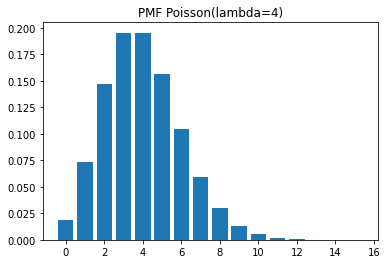

In [116]:
plt.bar(range(16), stats.poisson.pmf(range(16), 4));
plt.title('PMF Poisson(lambda=4)');

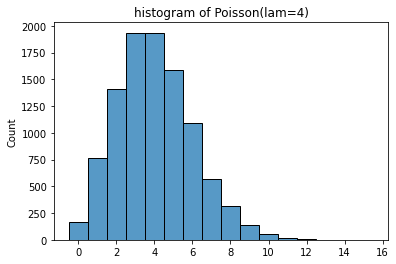

In [112]:
x = [rng.poisson(lam=4) for _ in range(10000)]
ax = sns.histplot(x, discrete=True)
ax.set(title='histogram of Poisson(lam=4)');

In [26]:
oi = rng.poisson(lam=lambda_A)  # output and input
total = oi[1] - oi[0]
print(oi, total)

[3 7] 4


In [28]:
def get_poisson(lam):
    oi = rng.poisson(lam=lam)
    return oi[1] - oi[0]  # total of day in and out

### Distribution of $Z = X_1 - X_0$

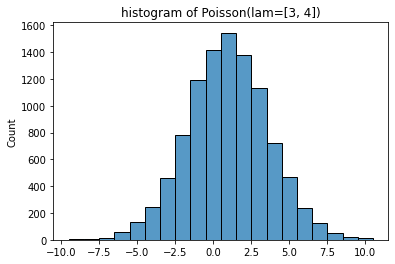

In [104]:
x = [get_poisson(lambda_A) for _ in range(10000)]
ax = sns.histplot(x, discrete=True)
ax.set(title=f'histogram of Poisson(lam={lambda_A})');

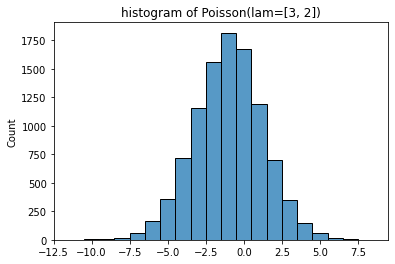

In [105]:
x = [get_poisson(lambda_B) for _ in range(10000)]
ax = sns.histplot(x, discrete=True)
ax.set(title=f'histogram of Poisson(lam={lambda_B})');

### Evolution of $S_t = Z_{t} + S_{t-1}$

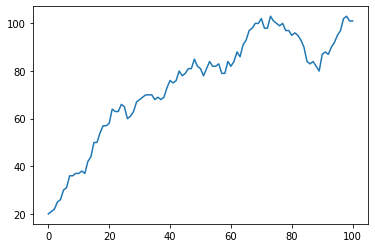

In [107]:
S = 20
Slist = [S]
for _ in range(100):  # time step
    S += get_poisson(lambda_A)
    Slist.append(S)
plt.plot(Slist);

In [109]:
def ps_simul(lam, nsteps=50, init=20):
    Slist = [init]
    for _ in range(nsteps):  # time step
        St = Slist[-1] + get_poisson(lam)
        Slist.append(St)
    return Slist

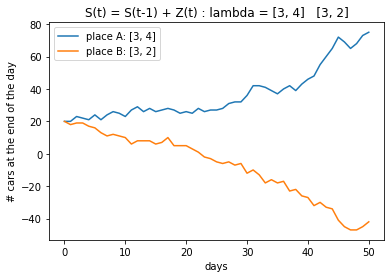

In [111]:
Sl = [ps_simul(lambda_A), ps_simul(lambda_B)]

plt.plot(Sl[0], label=f'place A: {lambda_A}');
plt.plot(Sl[1], label=f'place B: {lambda_B}');
plt.title(f'S(t) = S(t-1) + Z(t) : lambda = {lambda_A}   {lambda_B}')
plt.xlabel('days'); plt.ylabel('# cars at the end of the day');
plt.legend();

## Jack's Car Rental

- A good example to see a little more realistic problem.
- Must try to implement Policy iteration algorithm for this problem.

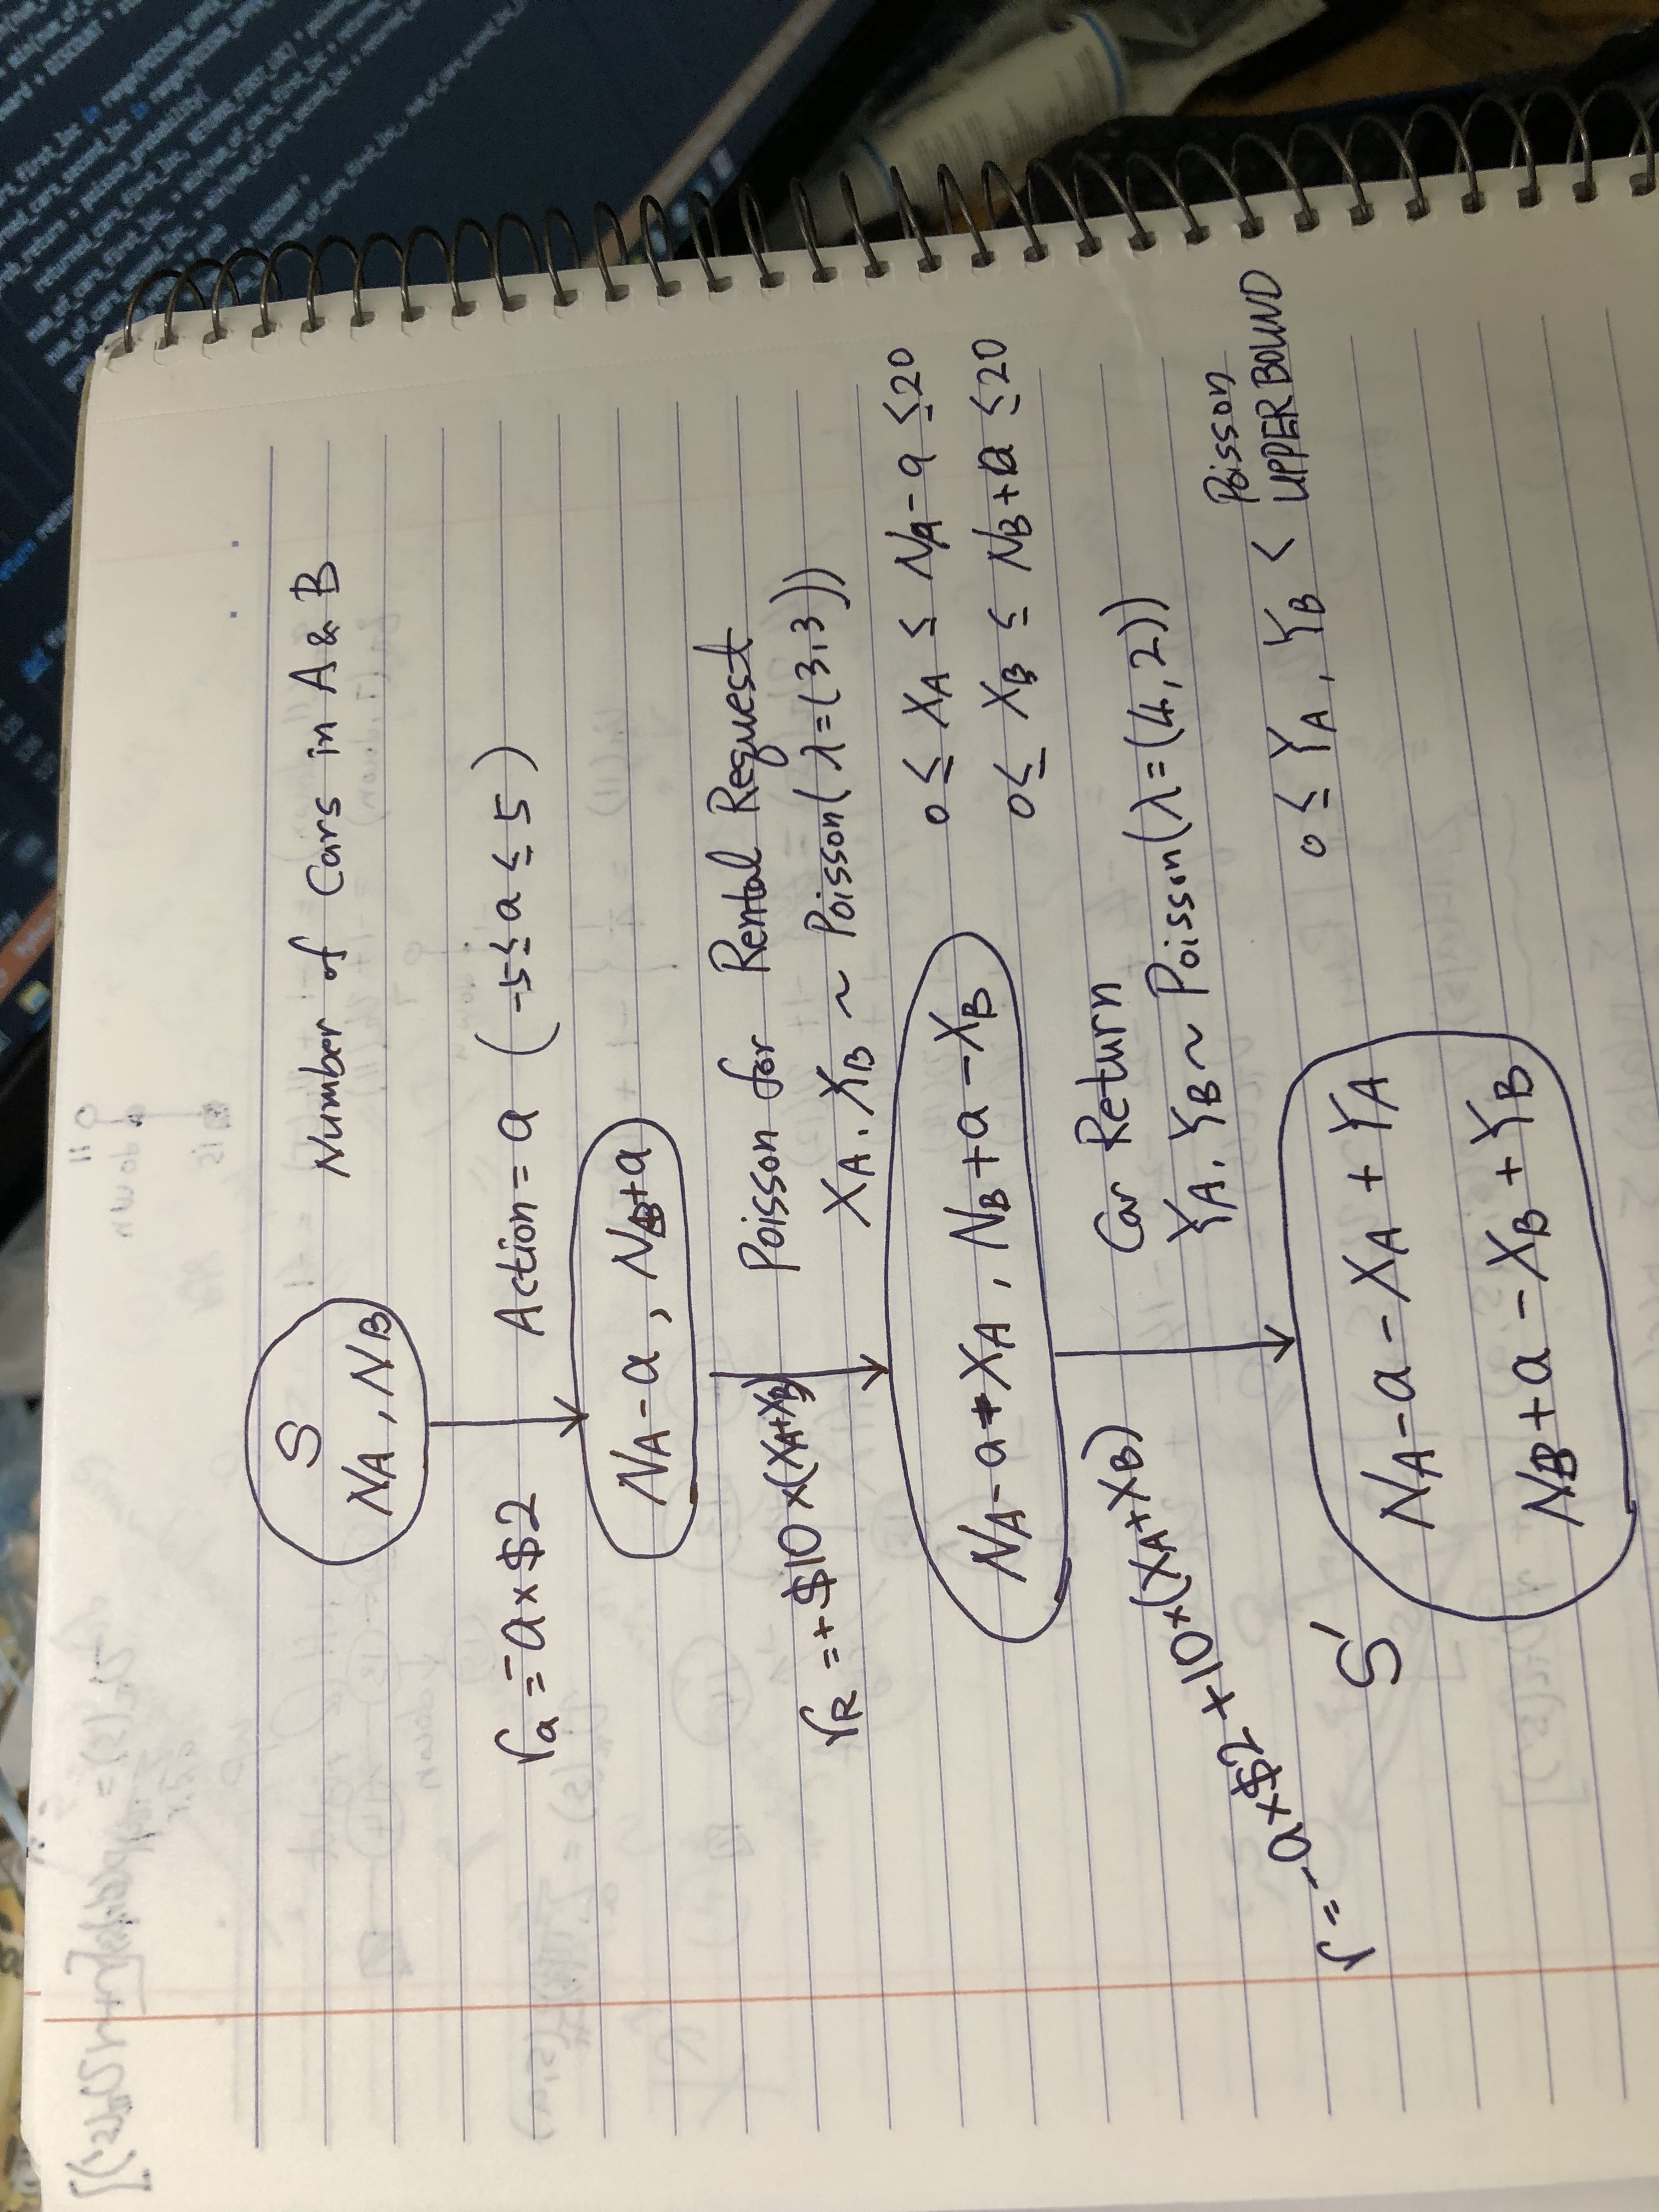

In [117]:
from IPython.display import Image
Image(filename='Fig4.2.State_transition_explained.jpg') 

In [130]:
x = np.arange(0, 640, 20)

a = -0.5
xp = np.sin(a + x*.01) * 15 + 20

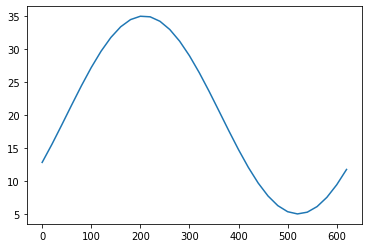

In [131]:
plt.plot(x, xp)